<a href="https://colab.research.google.com/github/InstitutodaVinci3/Diretorio-Teste/blob/master/Aula%205%20Consumidor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/Dados
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: '/content/drive/My Drive/Dados'
/content
drive  mapa-consumidor.html  sample_data


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


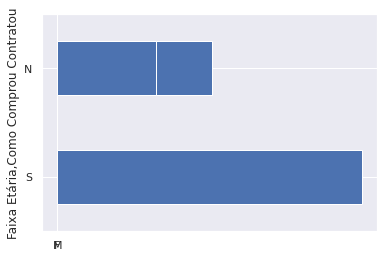

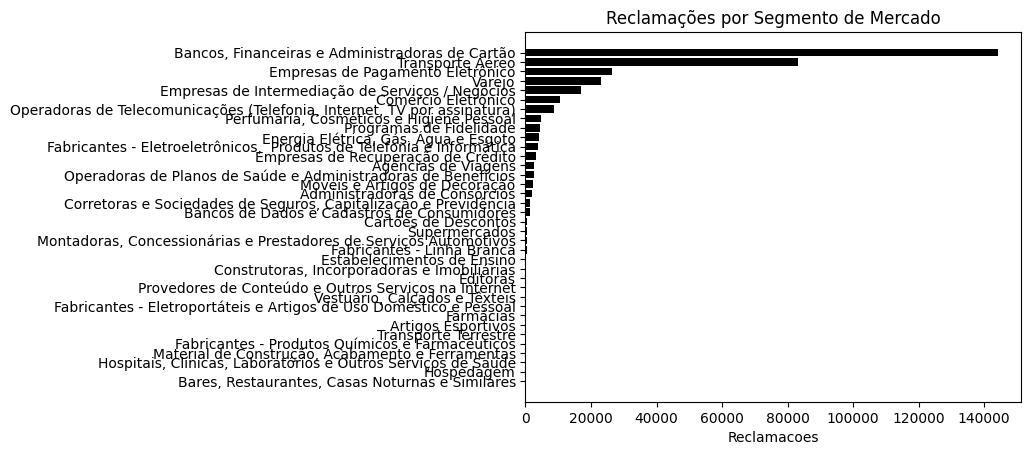

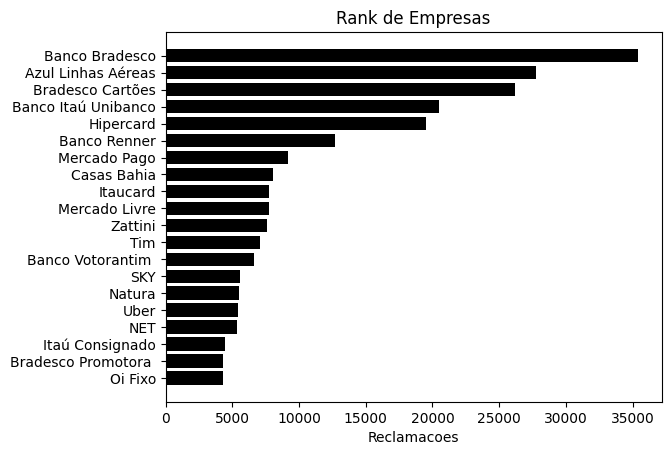

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:95: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


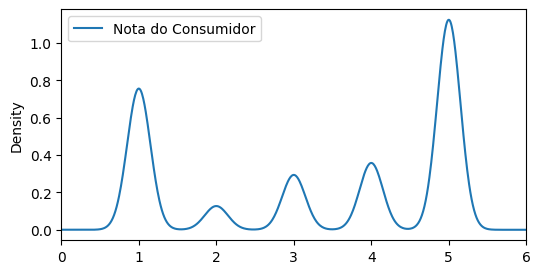

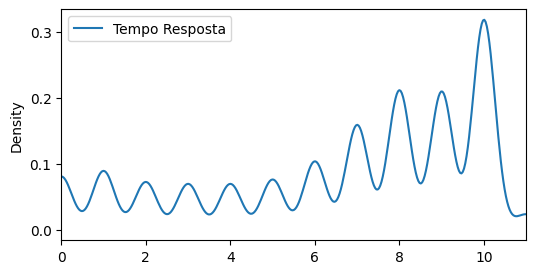

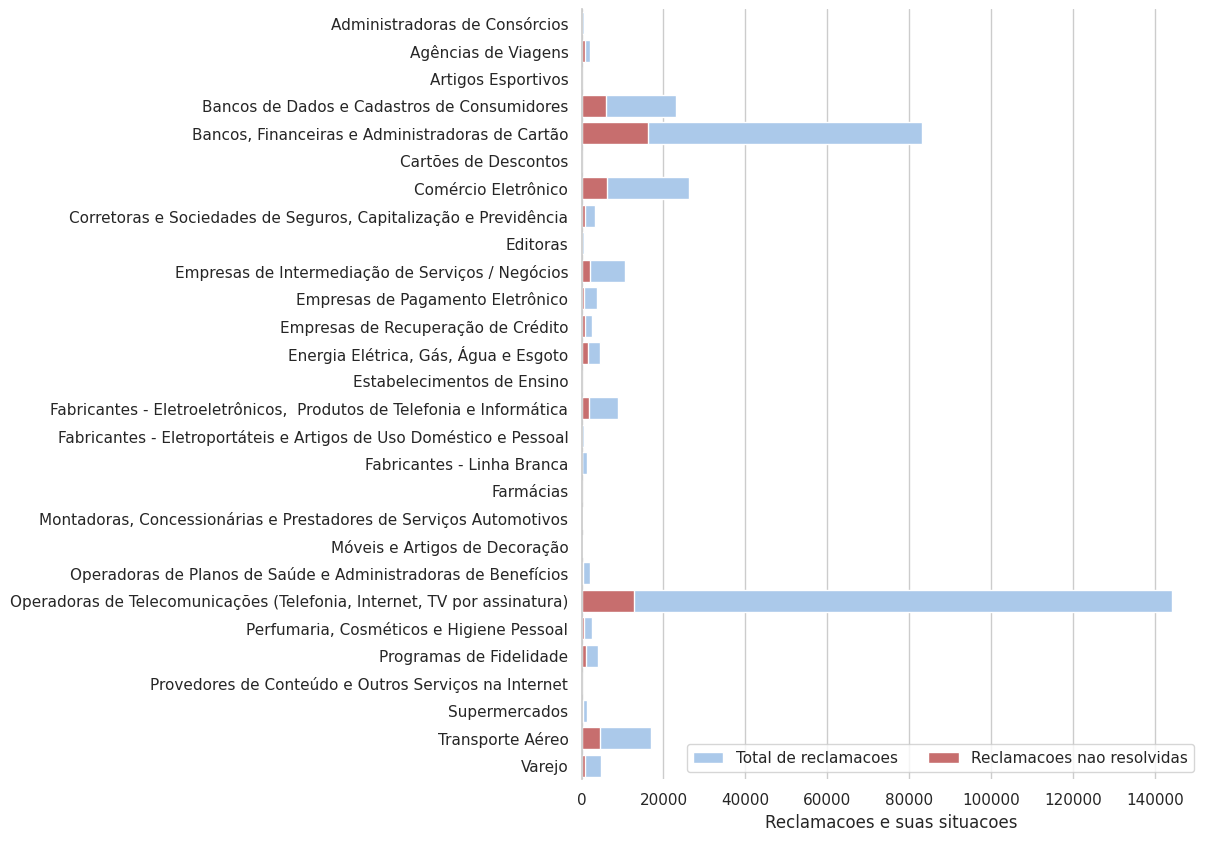

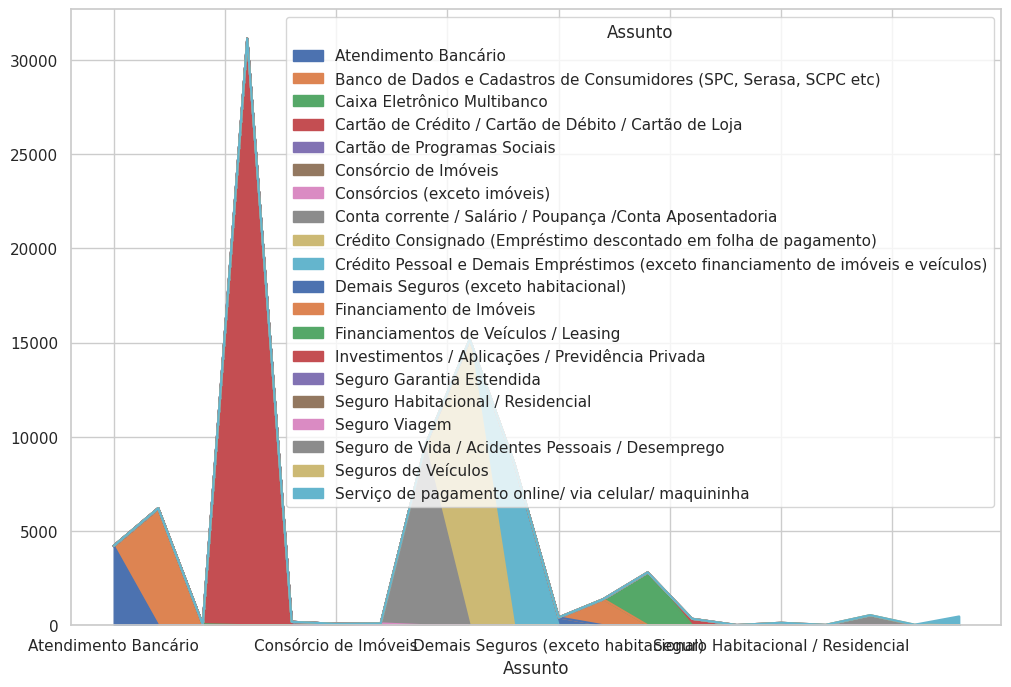

In [16]:
#Vamos analisar as bases de dados do consumidor de 2016(http://dados.gov.br/dataset/reclamacoes-do-consumidor-gov-br1)
#e correlacionar por Municípios (https://www.ibge.gov.br/geociencias/organizacao-do-territorio/estrutura-territorial/23701-divisao-territorial-brasileira.html?t=acesso-ao-produto)

#Importando as bibliotecas:
import pandas as pd
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns
import folium
plt.style.use('ggplot')
# Biblioteca para trabalhar com mapas:
!pip install folium
# Carregando a base de dados:
dataset = pd.read_csv('/content/drive/My Drive/Reviewnotebookf9b7a99aa3.ipynb/dadosgovbr---20182osemestre.csv',sep=';',encoding='latin1')
# Visualizando as 5 primeiras linhas do Dataframe:
dataset.head().T
dataset.groupby('UF')['UF'].count()
dataset[u'Sexo'].value_counts()
sns.set(style="darkgrid")
sexo = dataset[u'Sexo'].unique()
cont = dataset[u'Sexo'].value_counts()
sns.barplot(x=sexo,y=cont)
dataset.groupby('Sexo')[u'Faixa Etária'].value_counts()
df2 = dataset[dataset['Como Comprou Contratou']=='Internet']
df2.groupby(u'Faixa Etária')['Como Comprou Contratou'].value_counts().plot.barh()
df2 = dataset[dataset[u'Faixa Etária']=='entre 21 a 30 anos']
df2['Procurou Empresa'].value_counts().plot.barh()
dataset['Grupo Problema'].value_counts()
dataset[dataset['Grupo Problema'] == u'Cobrança / Contestação'][u'Problema'].value_counts()
dataset[u'Segmento de Mercado'].value_counts()
plt.style.use('ggplot')
plt.rcdefaults()
fig, ax = plt.subplots()
y_pos = np.arange(len(dataset['Segmento de Mercado'].value_counts()))
values = dataset['Segmento de Mercado'].value_counts()
segmentos = dataset['Segmento de Mercado'].unique()

ax.barh(y_pos, values, align='center', color='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(segmentos)
ax.invert_yaxis()
ax.set_xlabel('Reclamacoes')
ax.set_title('Reclamações por Segmento de Mercado')

plt.show()
fig, ax = plt.subplots()
y_pos = np.arange(len(dataset['Nome Fantasia'].value_counts()[:20]))
values = dataset['Nome Fantasia'].value_counts()[:20]
segmentos = dataset['Nome Fantasia'].unique()[:20]

ax.barh(y_pos, values, align='center', color='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(segmentos)
ax.invert_yaxis()
ax.set_xlabel('Reclamacoes')
ax.set_title('Rank de Empresas')

plt.show()
df = dataset.drop('Total',axis=1)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
dataset.plot.density(y='Nota do Consumidor',xlim=[0,6],figsize=[6,3])
dataset.plot.density(y='Tempo Resposta',xlim=[0,11],figsize=[6,3])
x = dataset.groupby(u'Segmento de Mercado')[u'Segmento de Mercado'].count()
#Filtrando os segmentos de mercado com mais de 20 reclamações
x = x[x > 20]
df = dataset[dataset[u'Segmento de Mercado'].isin(x.keys())]
df = df[df[u'Avaliação Reclamação']==u'Não Resolvida']
x1 = df.groupby(u'Segmento de Mercado')[u'Segmento de Mercado'].count()
x1
# Gráfico:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(8, 10))
sns.set_color_codes("pastel")
sns.barplot(x=x.values, y=x.keys(), label="Total de reclamacoes", color="b")
sns.set_color_codes("muted")
sns.barplot(x=x1.values, y=x1.keys(),label="Reclamacoes nao resolvidas", color="r")
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="", xlabel="Reclamacoes e suas situacoes")
sns.despine(left=False, bottom=True)
from folium import plugins
# Especificando a localização, o valor de zoom e o tipo do mapa:
mapa = folium.Map(location=[-15.788497,-47.879873],zoom_start=0.5,tiles='Stamen Toner')
coordenadas=[]
municipios = pd.read_csv('/content/drive/My Drive/Reviewnotebookf9b7a99aa3.ipynb/municipios.csv', encoding='latin1')
# Limitando o número de registros para não travar a máquina:
# Limitando o número de registros para não travar a máquina:
for cid,uf in zip(dataset.Cidade[:20000],dataset.UF[:20000]):
    cidadeUf = cid+' - '+uf

# Pegando os valores de longitude e latitude das duas bases:
    latitude = municipios[municipios['Mun/UF'] == cidadeUf]['latitude'].values
    longitude = municipios[municipios['Mun/UF'] == cidadeUf]['longitude'].values
    if latitude != '' and longitude != '':
  # Tratando os valores de lat e log:
        coordenadas.append([latitude,longitude])     
# Alimentando o mapa com as coordenadas fornecidas pelo código anterior:
mapa.add_child(plugins.HeatMap(coordenadas))        
mapa.save('mapa-consumidor.html')
# Filtrando por segmento de mercado:
df = dataset[dataset['Segmento de Mercado']==u'Bancos, Financeiras e Administradoras de Cartão']
df = df[df[u'Área']==u'Serviços Financeiros']
# Gráfico:
fig, ax = plt.subplots(figsize=(12,8))
df.groupby('Assunto')['Assunto'].value_counts().unstack().plot.area(ax=ax)


In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
